In [1]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [1]:
from sklearn.model_selection import train_test_split


In [ ]:
train_ds = torchvision.datasets.CIFAR10(root='./data/',download=True,train=True,transform=transform)
train_dataset = 

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='./data/',download=True,train=True,transform=transform)
train_dl = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=True,num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data',download=True,train=False,transform=transform)
test_dl = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=32,shuffle=False,num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
imgs,labels = next(iter(train_dl))

/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

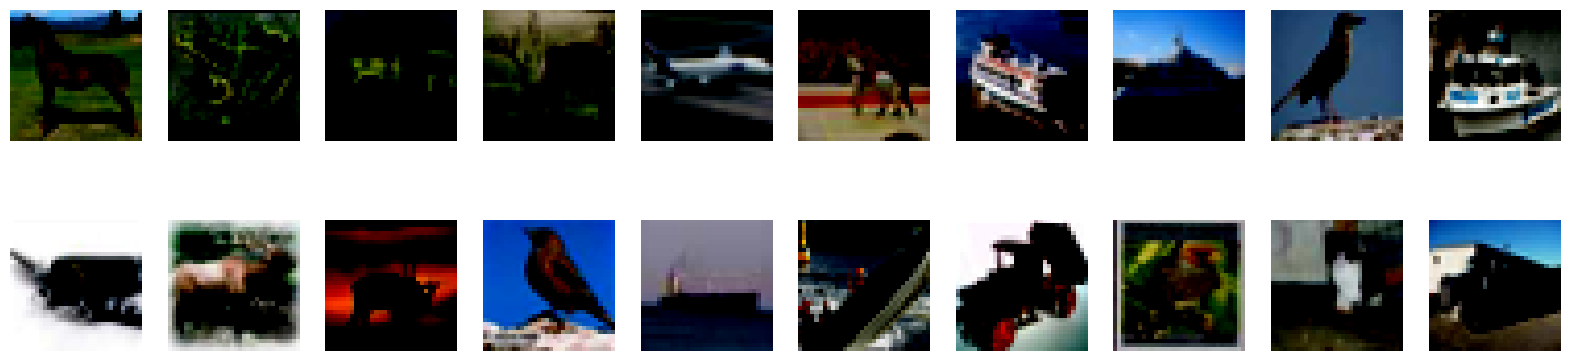

In [6]:
plt.figure(figsize=(20,5))

for i,image in enumerate(imgs[:20]):
    npimg = image.numpy().transpose((1,2,0))
    plt.subplot(2,10,i+1)
    plt.imshow(npimg,cmap=plt.cm.binary)
    plt.axis('off')

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # 第一个卷积层
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 第二个卷积层
        self.fc1 = nn.Linear(32*8*8, 256)  # 第一个全连接层
        self.fc2 = nn.Linear(256, 10)  # 输出层

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)  # 卷积后接池化
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 32*8*8)  # 展平图像
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 实例化网络
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [9]:
epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [10]:
for epoch in range(epochs):
    running_loss = 0.0
    
    for img,label in train_dl:
        output = model(img)
        loss = criterion(output,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        
    train_loss.append(running_loss)
    
    print(f'Epoch: {epoch}, loss: {running_loss/len(train_dl)}')

correct = 0 
total = 0 
for img,label in train_dl:
    output = model(img)
    _,pred = torch.max(output.data,1)
    
    correct += (pred == label).sum().item()
    total += label.size(0)
print(f'Accuracy: {correct/total*100}%')

/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 0, loss: 1.3562602085023832


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 1, loss: 0.9959542905376725


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 2, loss: 0.8287909439719036


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 3, loss: 0.7082321828782978


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 4, loss: 0.5977746030686379


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 5, loss: 0.49578936455708167


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 6, loss: 0.40399212707179677


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 7, loss: 0.32350884569106925


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 8, loss: 0.253434442015876


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Epoch: 9, loss: 0.19723327434428098


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Accuracy: 95.258%


In [18]:
model.eval()
with torch.no_grad():
    running_loss = 0
    correct = 0
    total = 0
    for img,label in test_dl:

        output = model(img)
        loss = criterion(output,label)
        _,pred = torch.max(output.data,1)

        running_loss+=loss.item()
        correct+=(pred == label).sum().item()
        total+=label.size(0)
        
    print(f'Loss: {running_loss/len(test_dl)}, Acc: {correct*100/total}%%!')


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <1C839354-4C01-36E7-9F8C-6367AB45B2A6> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <FD4DD173-D62C-3EAA-80A5-252A577C0547> /Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dl

Loss: 1.3682976663588715, Acc: 69.56%%!


In [15]:
import numpy as np
from PIL import Image

classes = ['airplane','bird','cat','deer','dog','frog','horse','ship','truck']

# 假设你已经加载了图像image为PIL.Image对象
image = Image.open('cat.jpg')  # 加载图像

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32,32)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

image_tensor = transform(image)  

image_tensor = image_tensor.unsqueeze(0)

output = model(image_tensor)

_,pred = torch.max(output.data,1)
classes[pred]

/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


'deer'